In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../')

import shutil
from train import run
import os
import itertools
import glob

def write_errormsg2file(msg, error_file_name):
    if not os.path.isfile(error_file_name):
        with open(error_file_name, 'w') as f:
            f.write(f'error : {msg}\n')
    else:
        with open(error_file_name, 'a') as f:
            f.write(f'error : {msg}\n')
           
    
def safe_do_exps(exps_dict= None, general_opts= None, device= None, exp_dir = '../figs/test', save_special= False, count_only= True, save_dir_special_root=None):    
    exp_idx = 0
    keys= list(exps.keys())
    
    val_list_list= []
    key_list = [] #eg: 'MODEL.MODEL_A.rotation_lambda'
    key_suffix_list= [] # eg: 'rotation_lambda'
    
    for key, val_list in exps_dict.items():
        key_list.append(key)
        key_suffix_list.append(key.split('.')[-1])
        
        val_list_list.append(val_list)
        
    attr_combination_list = [list(s) for s in itertools.product(*val_list_list)]
    
    print(f'number of total experiments : {len(attr_combination_list)}')
    
    count_already_trained=0
    count_train_from_begining=0
    count_deleted = 0
    for attr_combination in attr_combination_list:
        save_dir = f'{exp_dir}/'
        opts= []
        for idx in range(len(attr_combination)):
            opts += [key_list[idx], attr_combination[idx]]
            attr= attr_combination[idx]
            
            #####
            attr_is_list= False
            try:attr_is_list = isinstance(eval(attr), list)
            except:pass
            if attr_is_list:
                attr= '_'.join(list(map(str, eval(attr)))) ## [, ] should not be in the directory name because glob is sensitive to that !
            #####
            
            save_dir+= f'{key_suffix_list[idx]}({attr})@'
    
        save_dir = save_dir[:-1] # remove last '@' 

        exp_idx+=1
        opts_other= ['NAME', f'exp_idx({exp_idx})', 
                     'GENERAL.device', device, 
                     'GENERAL.save_dir', save_dir
                    ]
                     
        opts_other+= general_opts

        opts = opts_other + opts

        if os.path.isdir(save_dir):
            if 'TRAIN.epochs' in opts:
                epochs_idx = opts.index('TRAIN.epochs')
                epochs = int(opts[epochs_idx+1]) # IF THIS GIVES ERROR -> THERE IS A PROBLEM
                
                if len(glob.glob(f'{save_dir}/{epochs}_*.jpg'))!=0:
                    count_already_trained+=1
                    print(f'PASSING (already trained) -> {save_dir}')
                    continue
                else:
                    count_train_from_begining+=1
                    count_deleted += 1
                    print(f'deleting -> {save_dir}')
                    if not count_only:shutil.rmtree(save_dir)
            else:
                count_train_from_begining+=1
                count_deleted += 1
                print(f'deleting -> {save_dir}')
                if not count_only:shutil.rmtree(save_dir)         
        else:
            count_train_from_begining+=1
                
        save_folder_name= save_dir.split('/')[-1]
        
        if not count_only:
            print(f'running  -> {save_dir}')
            if len(save_folder_name)>255:
                print(f'\nFolder length is too long: len(results_saving_folder) -> {len(save_folder_name)} (<= 255)')
                print(save_folder_name)

            run(opts= opts, save_special=save_special)

            
    print(f'\n\nCOUNT ONLY (no exps running/ deleting) : {count_only}')
    print('count_already_trained (tot_epochs completed): ', count_already_trained)
    print('count_train_from_begining : ', count_train_from_begining)
    print('count_train_from_begining (after deleting existing exp) : ', count_deleted)

In [20]:
name= 'check_rotation_lambda'

exp_dir= f'../figs/{name}' #'/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/important/exp_set1'
save_dir_special_root = None #f'/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs_cvpr/{name}'

!rm -rf $exp_dir
!mkdir $exp_dir

if save_dir_special_root!=None:
    !rm -rf $save_dir_special_root
    !mkdir $save_dir_special_root

In [ ]:
count_only = False

device = 'cuda:0'

exps = {
        'DATASET.name': ['mnistdigits_grid2patch'],
    
        'MODEL.MODEL_A.rotation_lambda': ['1.0', '10.0', '100.0', '10000.0'],
        'MODEL.MODEL_A.lambda_scale_factor': ['1'], 
        'MODEL.MODEL_H.T': ['1'], 
        'MODEL.MODEL_DECODER.upsample_net': ['custom_v2'],
        'MODEL.MODEL_H.lr_H': ['0.0'],
        'MODEL.MODEL_H.H_init': ['uniformones_FourierBased'],
        'DATASET.img_size':  ['32'],
        'DATASET.num_samples_train': ['5']} #

general_opts= ['DATASET.batch_size_train', '2',
               'TRAIN.show_results_epoch', '1',
               'TRAIN.epochs', '1']


number of total experiments : 4
running  -> ../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(1.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)
Overide opts :  ['NAME', 'exp_idx(1)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(1.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)', 'DATASET.batch_size_train', '2', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'DATASET.name', 'mnistdigits_grid2patch', 'MODEL.MODEL_A.rotation_lambda', '1.0', 'MODEL.MODEL_A.lambda_scale_factor', '1', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v2', 'MODEL.MODEL_H.lr_H', '0.0', 'MODEL.MODEL_H.H_init', 'uniformones_FourierBased', 'DATASET.img_size', '32', 'DATASET.num_samples_train', '5']
DATASET:
  batch_size_t

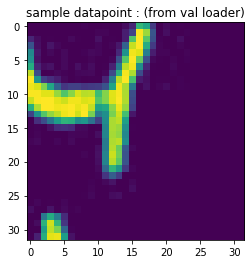

dataset value range :  9.999001804317231e-07 0.9999000430107117
decoder_upsample_net is a torch.nn.modules.module.Module
device : cuda:0
m : 1
after 1 epochs... yt_down range (train): [0.24611282348632812 22.5699405670166]
after 1 epochs... yt_down range (test): [-0.9690332412719727 21.369041442871094]
training loop time (for epoch: 1): 0.09779524803161621 sec
validation loop time (for epoch: 1): 15.162247896194458 sec




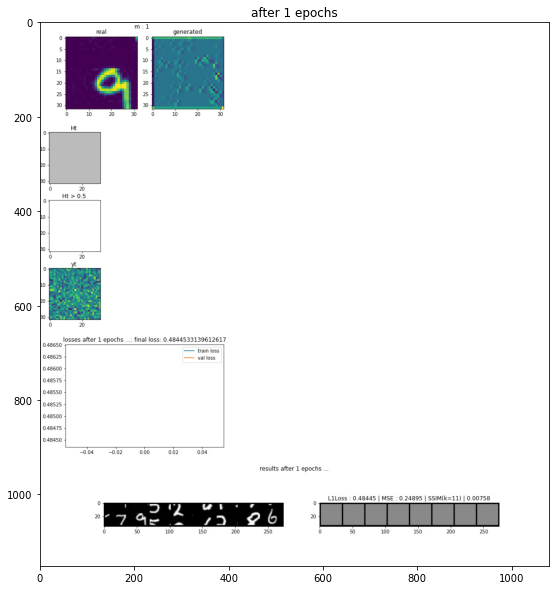

running  -> ../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(10.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)
Overide opts :  ['NAME', 'exp_idx(2)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(10.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)', 'DATASET.batch_size_train', '2', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'DATASET.name', 'mnistdigits_grid2patch', 'MODEL.MODEL_A.rotation_lambda', '10.0', 'MODEL.MODEL_A.lambda_scale_factor', '1', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v2', 'MODEL.MODEL_H.lr_H', '0.0', 'MODEL.MODEL_H.H_init', 'uniformones_FourierBased', 'DATASET.img_size', '32', 'DATASET.num_samples_train', '5']
DATASET:
  batch_size_train: 2
  delta: 1e-06
  img_

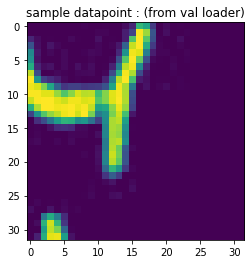

dataset value range :  9.999001804317231e-07 0.9999000430107117
decoder_upsample_net is a torch.nn.modules.module.Module
device : cuda:0
m : 1
after 1 epochs... yt_down range (train): [0.025103092193603516 2.6948678493499756]
after 1 epochs... yt_down range (test): [-0.17475438117980957 2.873778820037842]
training loop time (for epoch: 1): 0.08817124366760254 sec
validation loop time (for epoch: 1): 11.733704805374146 sec




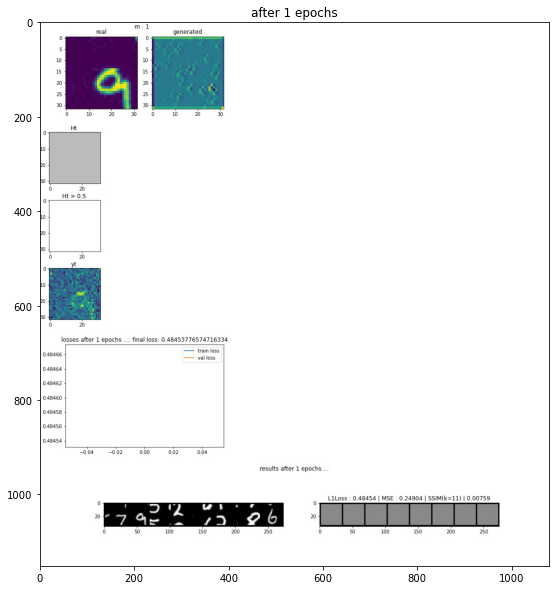

running  -> ../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(100.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)
Overide opts :  ['NAME', 'exp_idx(3)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(100.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)', 'DATASET.batch_size_train', '2', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'DATASET.name', 'mnistdigits_grid2patch', 'MODEL.MODEL_A.rotation_lambda', '100.0', 'MODEL.MODEL_A.lambda_scale_factor', '1', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v2', 'MODEL.MODEL_H.lr_H', '0.0', 'MODEL.MODEL_H.H_init', 'uniformones_FourierBased', 'DATASET.img_size', '32', 'DATASET.num_samples_train', '5']
DATASET:
  batch_size_train: 2
  delta: 1e-06
  i

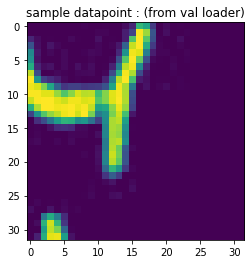

dataset value range :  9.999001804317231e-07 0.9999000430107117
decoder_upsample_net is a torch.nn.modules.module.Module
device : cuda:0
m : 1
after 1 epochs... yt_down range (train): [-0.007969245314598083 1.0143409967422485]
after 1 epochs... yt_down range (test): [-0.02834267169237137 1.0825116634368896]
training loop time (for epoch: 1): 0.07877969741821289 sec
validation loop time (for epoch: 1): 11.728711366653442 sec




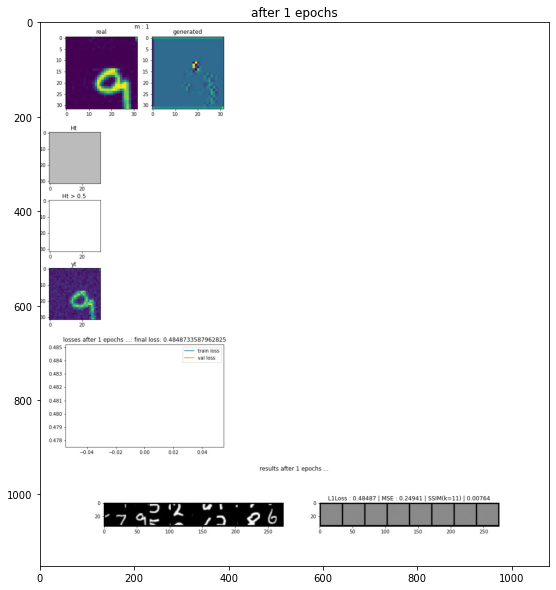

running  -> ../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(10000.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)
Overide opts :  ['NAME', 'exp_idx(4)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/check_rotation_lambda/name(mnistdigits_grid2patch)@rotation_lambda(10000.0)@lambda_scale_factor(1)@T(1)@upsample_net(custom_v2)@lr_H(0.0)@H_init(uniformones_FourierBased)@img_size(32)@num_samples_train(5)', 'DATASET.batch_size_train', '2', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'DATASET.name', 'mnistdigits_grid2patch', 'MODEL.MODEL_A.rotation_lambda', '10000.0', 'MODEL.MODEL_A.lambda_scale_factor', '1', 'MODEL.MODEL_H.T', '1', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v2', 'MODEL.MODEL_H.lr_H', '0.0', 'MODEL.MODEL_H.H_init', 'uniformones_FourierBased', 'DATASET.img_size', '32', 'DATASET.num_samples_train', '5']
DATASET:
  batch_size_train: 2
  delta: 1e-

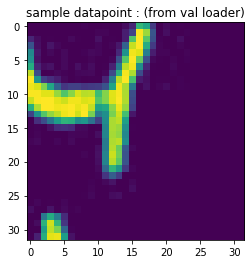

dataset value range :  9.999001804317231e-07 0.9999000430107117
decoder_upsample_net is a torch.nn.modules.module.Module
device : cuda:0
m : 1
after 1 epochs... yt_down range (train): [-0.0001030460698530078 0.7363348007202148]
after 1 epochs... yt_down range (test): [-0.0001680917339399457 0.751834511756897]
training loop time (for epoch: 1): 0.08583378791809082 sec
validation loop time (for epoch: 1): 12.143052339553833 sec




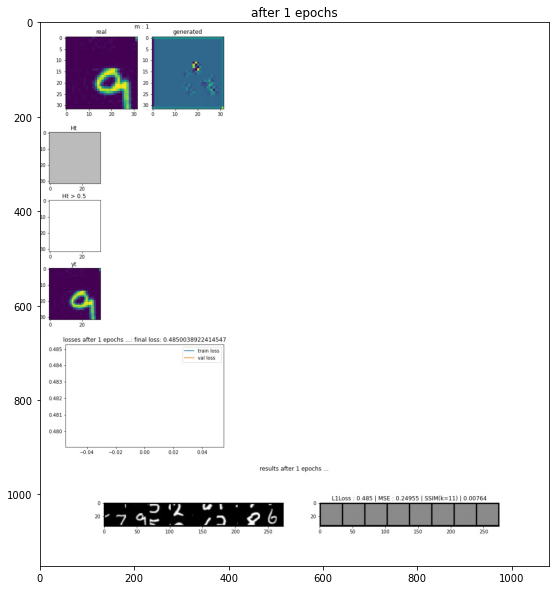



COUNT ONLY (no exps running/ deleting) : False
count_already_trained (tot_epochs completed):  0
count_train_from_begining :  4
count_train_from_begining (after deleting existing exp) :  0


In [22]:
safe_do_exps(exps, general_opts, device, exp_dir = exp_dir, save_special= True, count_only= count_only, save_dir_special_root= save_dir_special_root)